# Trabalho Lógica de Programação (Dez 2020)

***

### Alunos
* Rafael Pinto Cajé | Anderson Lira

**Professor:** Leandro Masanori 

### Conteúdo
* Raspagem e análise de dados públicos.

### Tema
* Variação da escolaridade dos candidatos a vereadores de 2016 para 2020.

***

In [2]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [3]:
filename1 = r'C:\Users\USER\consulta_cand_2016_SP.csv'
df1 = pd.read_csv(filename1, sep = ';', encoding='iso-8859-1', usecols = ['NM_CANDIDATO', 'DS_CARGO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA'])

#-----------------------------

filename2 = r'C:\Users\USER\consulta_cand_2020_SP.csv'
df2 = pd.read_csv(filename2, sep = ';', encoding='iso-8859-1', usecols = ['NM_CANDIDATO', 'DS_CARGO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA'])

In [4]:
df1.head()

,DS_CARGO,NM_CANDIDATO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA
0,VICE-PREFEITO,IDEVALTE UNGARI,MASCULINO,LÊ E ESCREVE,CASADO(A),BRANCA
1,PREFEITO,RAFAEL MASCHERIN MONTOURO,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA
2,VEREADOR,GLEISON JOÃO GOMES PEGO,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA
3,VEREADOR,DIVA APARECIDA LORANDO,FEMININO,ENSINO MÉDIO COMPLETO,SEPARADO(A) JUDICIALMENTE,BRANCA
4,VEREADOR,ORLANDO COUTO JUNIOR,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA


In [5]:
df2.head()

,DS_CARGO,NM_CANDIDATO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA
0,VEREADOR,MOACIR BAQUIÃO,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA
1,VEREADOR,MARIA CRISTINA TAMURA MATOBA,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA
2,VEREADOR,ARLETE APARECIDA GONÇALVES LEITE,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA
3,VEREADOR,PHETERSON DANIEL FELIX PEREIRA,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA
4,VEREADOR,FERNANDO FANTIM,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86779 entries, 0 to 86778
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DS_CARGO           86779 non-null  object
 1   NM_CANDIDATO       86779 non-null  object
 2   DS_GENERO          86779 non-null  object
 3   DS_GRAU_INSTRUCAO  86779 non-null  object
 4   DS_ESTADO_CIVIL    86779 non-null  object
 5   DS_COR_RACA        86779 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93767 entries, 0 to 93766
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DS_CARGO           93767 non-null  object
 1   NM_CANDIDATO       93767 non-null  object
 2   DS_GENERO          93767 non-null  object
 3   DS_GRAU_INSTRUCAO  93767 non-null  object
 4   DS_ESTADO_CIVIL    93767 non-null  object
 5   DS_COR_RACA        93767 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [8]:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'
print (color.BOLD + 'GRAU DE INSTRUÇÃO' + color.END)
estudo = df2.drop_duplicates(['DS_GRAU_INSTRUCAO'])
print (estudo['DS_GRAU_INSTRUCAO'])
print()

GRAU DE INSTRUÇÃO
0                    SUPERIOR COMPLETO
1                ENSINO MÉDIO COMPLETO
6          ENSINO FUNDAMENTAL COMPLETO
14       ENSINO FUNDAMENTAL INCOMPLETO
30                        LÊ E ESCREVE
35                 SUPERIOR INCOMPLETO
63             ENSINO MÉDIO INCOMPLETO
24872                       ANALFABETO
Name: DS_GRAU_INSTRUCAO, dtype: object



In [9]:
df1.shape

(86779, 6)

In [10]:
df2.shape

(93767, 6)

# Comparativo Escolaridade dos Candidados

<AxesSubplot:title={'center':'Escolaridade dos candidatos (%)'}>

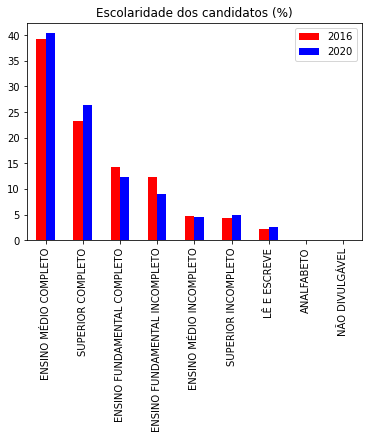

In [11]:
escol_2016 = df1.query('DS_CARGO == "VEREADOR"')
escol_2020 = df2.query('DS_CARGO == "VEREADOR"')
pd.concat(
    [(escol_2016['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('2016'))*100, 
     (escol_2020['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('2020'))*100], 
    axis=1).plot.bar(color=['red', 'blue'], title='Escolaridade dos candidatos (%)')

## Comparativo Escolaridade por Sexo

SEXO
0    MASCULINO
1     FEMININO
Name: DS_GENERO, dtype: object



<AxesSubplot:title={'center':'Escolaridade Masculino x Feminino (%)'}>

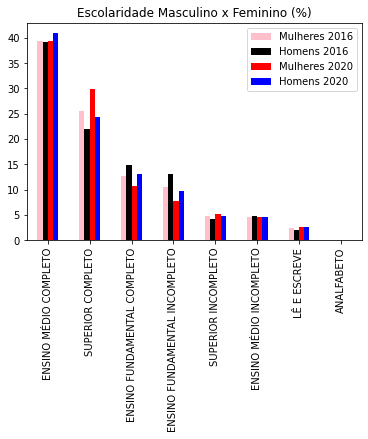

In [12]:
print (color.BOLD + 'SEXO' + color.END)
estudo = df2.drop_duplicates(['DS_GENERO'])
print (estudo['DS_GENERO'])
print()
fem_df1 = df1.query('DS_GENERO == "FEMININO" & DS_CARGO == "VEREADOR"')
mas_df1 = df1.query('DS_GENERO == "MASCULINO" & DS_CARGO == "VEREADOR"')
fem_df2 = df2.query('DS_GENERO == "FEMININO" & DS_CARGO == "VEREADOR"')
mas_df2 = df2.query('DS_GENERO == "MASCULINO" & DS_CARGO == "VEREADOR"')
pd.concat(
    [(fem_df1['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Mulheres 2016'))*100, 
     (mas_df1['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Homens 2016'))*100,
     (fem_df2['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Mulheres 2020'))*100,
     (mas_df2['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Homens 2020'))*100], 
    axis=1).plot.bar(color=['pink', 'black', 'red', 'blue'], title='Escolaridade Masculino x Feminino (%)')

## Comparativo Escolaridade Estado Civil

ESTADO CIVIL
0                     CASADO(A)
2                 DIVORCIADO(A)
7                   SOLTEIRO(A)
18                     VIÚVO(A)
32    SEPARADO(A) JUDICIALMENTE
Name: DS_ESTADO_CIVIL, dtype: object



<AxesSubplot:title={'center':'Escolaridade por Estado Civil (%)'}>

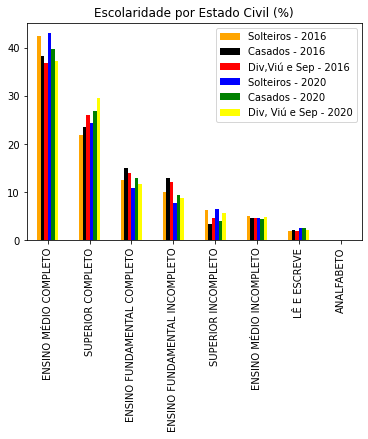

In [13]:
print (color.BOLD + 'ESTADO CIVIL' + color.END)
estudo = df2.drop_duplicates(['DS_ESTADO_CIVIL'])
print (estudo['DS_ESTADO_CIVIL'])
print()
sol_df1 = df1.query('DS_ESTADO_CIVIL == "SOLTEIRO(A)" & DS_CARGO == "VEREADOR"')
cas_df1 = df1.query('DS_ESTADO_CIVIL == "CASADO(A)" & DS_CARGO == "VEREADOR"')
div_df1 = df1.query('DS_ESTADO_CIVIL == "DIVORCIADO(A)" & DS_CARGO == "VEREADOR"'
                     or 'DS_ESTADO_CIVIL == "VIÚVO(A)" & DS_CARGO == "VEREADOR"'
                     or 'DS_ESTADO_CIVIL == "SEPARADO(A) JUDICIALMENTE" & DS_CARGO == "VEREADOR"')
sol_df2 = df2.query('DS_ESTADO_CIVIL == "SOLTEIRO(A)" & DS_CARGO == "VEREADOR"')
cas_df2 = df2.query('DS_ESTADO_CIVIL == "CASADO(A)" & DS_CARGO == "VEREADOR"')
div_df2 = df2.query('DS_ESTADO_CIVIL == "DIVORCIADO(A)" & DS_CARGO == "VEREADOR"'
                     or 'DS_ESTADO_CIVIL == "VIÚVO(A)" & DS_CARGO == "VEREADOR"'
                     or 'DS_ESTADO_CIVIL == "SEPARADO(A) JUDICIALMENTE" & DS_CARGO == "VEREADOR"')
pd.concat(
    [(sol_df1['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Solteiros - 2016'))*100,
     (cas_df1['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Casados - 2016'))*100,
     (div_df1['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Div,Viú e Sep - 2016'))*100,
     (sol_df2['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Solteiros - 2020'))*100,
     (cas_df2['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Casados - 2020'))*100,
     (div_df2['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Div, Viú e Sep - 2020'))*100],
    axis=1).plot.bar(color=['orange', 'black', 'red', 'blue', 'green', 'yellow'], title='Escolaridade por Estado Civil (%)')

## Escolaridade por Etnia 2016

ETNIA
0               BRANCA
7                PARDA
16             AMARELA
56               PRETA
1769    NÃO DIVULGÁVEL
1922          INDÍGENA
Name: DS_COR_RACA, dtype: object



<AxesSubplot:title={'center':'Escolaridade por Etnia 2016 (%)'}>

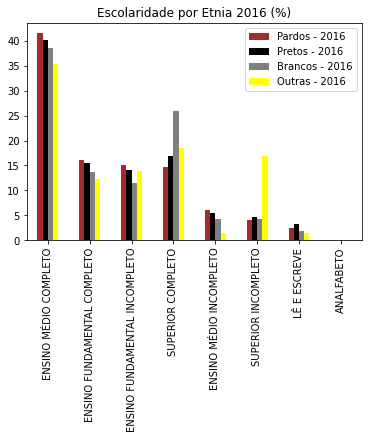

In [14]:
print (color.BOLD + 'ETNIA' + color.END)
estudo = df1.drop_duplicates(['DS_COR_RACA'])
print (estudo['DS_COR_RACA'])
print()
par_df1 = df1.query('DS_COR_RACA == "PARDA" & DS_CARGO == "VEREADOR"')
pre_df1 = df1.query('DS_COR_RACA == "PRETA" & DS_CARGO == "VEREADOR"')
bra_df1 = df1.query('DS_COR_RACA == "BRANCA" & DS_CARGO == "VEREADOR"')
oth_df1 = df1.query('DS_COR_RACA == "INDÍGENA" & DS_CARGO == "VEREADOR"'
                     or 'DS_COR_RACA == "SEM INFORMAÇÃO" & DS_CARGO == "VEREADOR"'
                     or 'DS_COR_RACA == "AMARELA" & DS_CARGO == "VEREADOR"')

pd.concat(
    [(par_df1['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Pardos - 2016'))*100,
     (pre_df1['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Pretos - 2016'))*100,
     (bra_df1['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Brancos - 2016'))*100,
     (oth_df1['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Outras - 2016'))*100],
    axis=1).plot.bar(color=['brown', 'black', 'grey', 'yellow'], title='Escolaridade por Etnia 2016 (%)')

## Escolaridade por Etnia 2020

ETNIA
0               BRANCA
1                PARDA
5                PRETA
198     SEM INFORMAÇÃO
234            AMARELA
2526          INDÍGENA
Name: DS_COR_RACA, dtype: object



<AxesSubplot:title={'center':'Escolaridade por Etnia 2020 (%)'}>

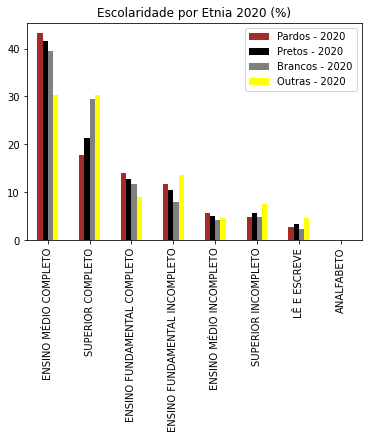

In [15]:
print (color.BOLD + 'ETNIA' + color.END)
estudo = df2.drop_duplicates(['DS_COR_RACA'])
print (estudo['DS_COR_RACA'])
print()
par_df2 = df2.query('DS_COR_RACA == "PARDA" & DS_CARGO == "VEREADOR"')
pre_df2 = df2.query('DS_COR_RACA == "PRETA" & DS_CARGO == "VEREADOR"')
bra_df2 = df2.query('DS_COR_RACA == "BRANCA" & DS_CARGO == "VEREADOR"')
oth_df2 = df2.query('DS_COR_RACA == "INDÍGENA" & DS_CARGO == "VEREADOR"'
                     or 'DS_COR_RACA == "SEM INFORMAÇÃO" & DS_CARGO == "VEREADOR"'
                     or 'DS_COR_RACA == "AMARELA" & DS_CARGO == "VEREADOR"')
pd.concat(
    [(par_df2['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Pardos - 2020'))*100,
     (pre_df2['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Pretos - 2020'))*100,
     (bra_df2['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Brancos - 2020'))*100,
     (oth_df2['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).rename('Outras - 2020'))*100],
    axis=1).plot.bar(color=['brown', 'black', 'grey', 'yellow'], title='Escolaridade por Etnia 2020 (%)')

Número de candidatos com Superior em 2016 por ETNIA
BRANCA    59823
PARDA     15502
PRETA      6367
OUTRAS      382
Name: DS_COR_RACA, dtype: int64

Número de candidatos com Superior em 2020 por ETNIA
BRANCA    60528
PARDA     18331
PRETA      8459
OUTRAS      969
Name: DS_COR_RACA, dtype: int64



([<matplotlib.patches.Wedge at 0xda8ef28>,
 [Text(-0.6606608085960535, 1.0017620955023248, 'BRANCA'),
  Text(0.2695205772344139, -1.0664701863846118, 'PARDA'),
  Text(1.2120417236696492, -0.47005835816832964, 'PRETA'),
  Text(1.099346151481206, -0.037921487621951355, 'OUTRAS')],
 [Text(-0.38538547168103116, 0.5843612223763561, '68.6%'),
  Text(0.14701122394604393, -0.5817110107552427, '20.8%'),
  Text(0.7458718299505533, -0.28926668194974126, '9.6%'),
  Text(0.599643355353385, -0.02068444779379165, '1.1%')])

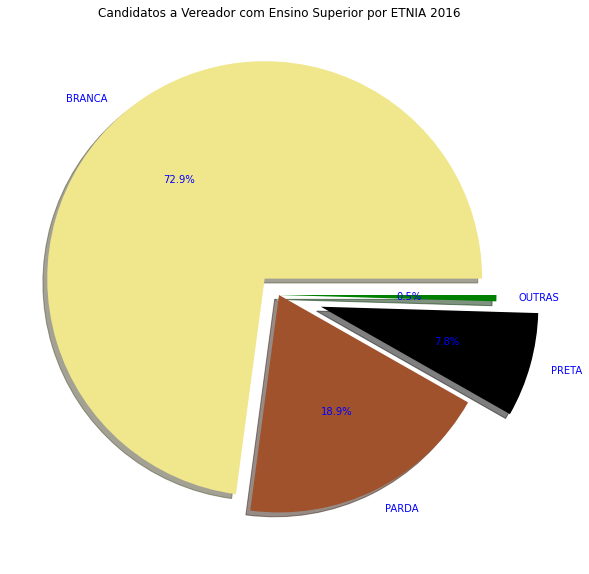

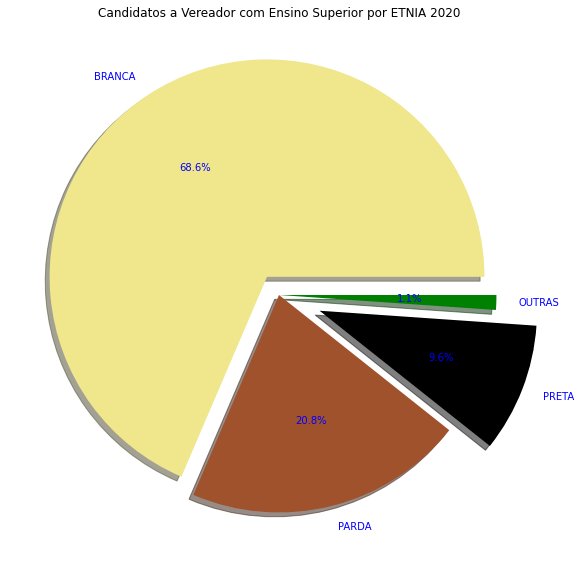

In [24]:
df_cargo1 = df1.query('DS_CARGO == "VEREADOR"')
df_cargo1 = df_cargo1.set_index('DS_CARGO')
df_cargo1['DS_COR_RACA'] = df_cargo1['DS_COR_RACA'].map({'AMARELA': 'OUTRAS',
                                                         'INDÍGENA': 'OUTRAS',
                                                         'SEM INFORMAÇÃO': 'OUTRAS',
                                                         'NÃO DIVULGÁVEL': 'OUTRAS'}).fillna(df_cargo1['DS_COR_RACA'])
df_cargo1 = df_cargo1.reset_index()
raca2016 = df_cargo1['DS_COR_RACA'].value_counts()
print ('Número de candidatos com Superior em 2016 por ETNIA')
print (raca2016)
print ()
plt.figure(figsize=(10,10))
labels = ['BRANCA', 'PARDA', 'PRETA', 'OUTRAS']
colors = ['khaki', 'sienna', 'black', 'green']
explode = (0.1, 0, 0.2, 0)
plt.title("Candidatos a Vereador com Ensino Superior por ETNIA 2016")
plt.pie(raca2016, labels=labels, autopct='%1.1f%%', textprops=dict(color='b'), colors=colors, shadow = True, explode=explode)

df_cargo2 = df2.query('DS_CARGO == "VEREADOR"')
df_cargo2 = df_cargo2.set_index('DS_CARGO')
df_cargo2['DS_COR_RACA'] = df_cargo2['DS_COR_RACA'].map({'AMARELA': 'OUTRAS',
                                                         'INDÍGENA': 'OUTRAS',
                                                         'SEM INFORMAÇÃO': 'OUTRAS',
                                                         'NÃO DIVULGÁVEL': 'OUTRAS'}).fillna(df_cargo2['DS_COR_RACA'])
df_cargo2 = df_cargo2.reset_index()
raca2020 = df_cargo2['DS_COR_RACA'].value_counts()
print ('Número de candidatos com Superior em 2020 por ETNIA')
print (raca2020)
print()
plt.figure(figsize=(10,10))
labels = ['BRANCA', 'PARDA', 'PRETA', 'OUTRAS']
colors = ['khaki', 'sienna', 'black', 'green']
explode = (0.1, 0, 0.2, 0)
plt.title("Candidatos a Vereador com Ensino Superior por ETNIA 2020")
plt.pie(raca2020, labels=labels, autopct='%1.1f%%', textprops=dict(color='b'), colors=colors, shadow = True, explode=explode)